# Palmer Penguins Dataset Analysis
## Machine Learning, Fall 2021
### Name: Michael Hlavaty

__TO-DO__
1. Introduce dataset
2. Describe ethical implications of using this dataset...e.g how was the data obtained?
3. Analyze physical characterstics with respect to `sex`, `island`
4. Analyze dataset frequency distributions (bar graphs)

In this notebook, I begin to dive into the Palmer Archipelago (Antarctica) penguin dataset. 

## Sources

* https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data?select=penguins_size.csv
* https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html
* https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
* https://www.kite.com/python/docs/matplotlib.collections.PathCollection.legend_elements
* https://www.youtube.com/watch?v=4DnWYK88-E4&ab_channel=SessionWithSumit

## Data Exploration

In [1]:
# Importing a number of useful Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

Let's import the data. I've downloaded the necessary `.csv` files into a folder named `palmer_penguins`

In [2]:
data = pd.read_csv('palmer_penguins/penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Okay, so here's a snippet of the dataset. I can already see some `NaN` values which will need to be cleaned. I can see also see all of the variables in the first row. According to the dataset's documentation,

* `species`: penguin species (Chinstrap, Adélie, or Gentoo)
* `culmen_length_mm`: culmen length (mm) (according to the Oxford Dictionary, the culmen is "the upper ridge of a bird's beak")
* `culmen_depth_mm`: culmen depth (mm)
* `flipper_length_mm`: flipper length (mm)
* `body_mass_g`: body mass (g)
* `island`: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* `sex`: penguin sex



### Cleaning the Data

As noted above, we need to first clean the data by looking for `NaN` values

In [3]:
data[data.isnull().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


Okay, so I can see 10 penguins with missing values. Since there are more than 300 penguins, I feel comfortable removing the penguins from the dataset rather than removing the columns with the respective missing values. As observed in the table above, all the penguins with missing data also have `NaN` values for `sex`. Thus, I can remove all penguins with missing, or null data in the `sex` column.

In [4]:
data = data[data.sex.notnull()] # removing all observations (penguins) whose sex is null, or NaN
data[data.isnull().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


Great! It appears that we removed all `NaN` values from the dataset. However, there may still being missing or unexpected (negative) values. Let's look at some basic statistics for the dataset.

In [5]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


There are 334 rows in the dataset. The mean `flipper_length_mm` > `culmen_length_mm` > `culmen_depth_mm`, which makes sense because I'd expect a penguin's flipper to be longer than their culmen, and I would expect that the depth of the culmen to be shorter than the length of the culmen and its flipper. There does not appear to be any outliers yet: there are no negative values based on the `min` values and the `min` doesn't appear to significantly deviate from the `25%` percentile, and the `max` values do not appear to be very large relative to the `75%` percentile. The values from this table seem reasonable, so I'll start diving a bit deeper into the dataset.

### Frequency Distributions in Histograms

Let's start by looking at the frequency distributions for each variable. Frequency distributions can be well-modeled using histograms.

#### `species` Distribution

[146, 68, 120]


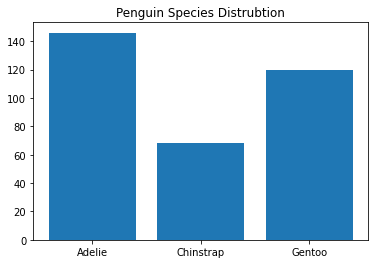

In [6]:
adelie = data[data.species=="Adelie"]
chinstrap = data[data.species=="Chinstrap"]
gentoo = data[data.species=="Gentoo"]
counts = [len(adelie),len(chinstrap),len(gentoo)]
print(counts)
plt.bar(['Adelie','Chinstrap','Gentoo'], counts)
plt.title("Penguin Species Distrubtion")
plt.show()

There appears to be around 146 Adelie penguins, 68 Chinstrap penguins, and 120 Gentoo penguins.

#### `species` Distribution by `island`

In [7]:
dream = [len(adelie[adelie.island=="Dream"]),len(chinstrap[chinstrap.island=="Dream"]),len(gentoo[gentoo.island=="Dream"]),]
torgersen = [len(adelie[adelie.island=="Torgersen"]),len(chinstrap[chinstrap.island=="Torgersen"]),len(gentoo[gentoo.island=="Torgersen"]),]
biscoe = [len(adelie[adelie.island=="Biscoe"]),len(chinstrap[chinstrap.island=="Biscoe"]),len(gentoo[gentoo.island=="Biscoe"]),]

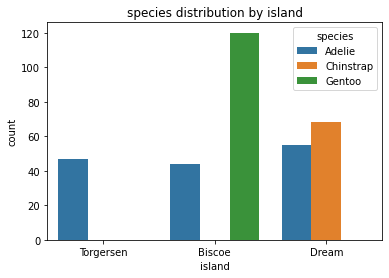

In [8]:
sns.countplot(x='island', hue='species',data=data)
plt.title("species distribution by island")
plt.show()

It appears that Adelie penguins are from all three islands, and they are the only penguins from Torgersen. Gentoo penguins are only from Biscoe island, and Chinstrap penguins are only from Dream island. I think that island will be an especially distinguishing parameter in the classifier because there is very little overlap.

#### `sex` Distribution by `species`

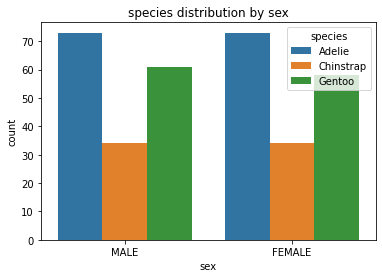

In [28]:
sns.countplot(x='sex',hue='species',data=data)
plt.title("species distribution by sex")
plt.show()

Okay, so firstly, I see a third `sex`, ".", belonging to what appears to be one Gentoo penguin. I'm not sure why that is the case, but it doesn't seem to be skewing the data so I'll assume that the `sex` was undetermined. I can remove it later on if I want to. Secondly, it appears that the `sex` distributions are relatively equal for the three `species`.

In [26]:
# Removing "." sex observation
data = data[data.sex != "."]

#### `culmen_length_mm` considering `species`

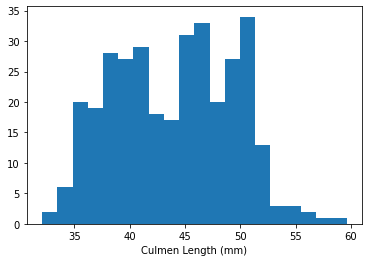

In [10]:
plt.hist(data.culmen_length_mm, bins=20)
plt.xlabel("Culmen Length (mm)")
plt.show()

The histograms appears to be trimodal, with peaks around culmen lengths of 40mm, 46mm, and 50mm. Let's color the data with respect to each penguin's species to see if there are any trends within each species.

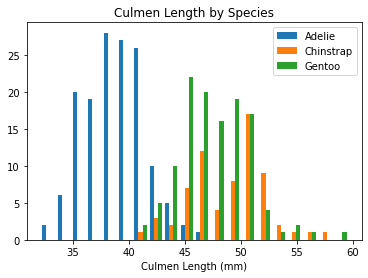

In [11]:
plt.hist([adelie.culmen_length_mm,chinstrap.culmen_length_mm,gentoo.culmen_length_mm],
        label=['Adelie','Chinstrap','Gentoo'],
        bins=20)
plt.legend()
plt.title("Culmen Length by Species")
plt.xlabel("Culmen Length (mm)")
plt.show()

Okay, so I can see three bell-curved distributions. The Adelie penguins tend to have shortest culmen lengths, with a peak culmen length around 37mm. There is also little overlap between the Adelie penguin's culmen length and the other species' culmen length. The Gentoo penguins tend to have longer culmen lengths, with a peak around 45mm. The Chinstrap penguins typically have the longest culmen length, with a peak around 51mm.

#### `culmen_depth_mm` considering `species`

Let's explore the relationship between the depth of a penguin's culmen and its species.

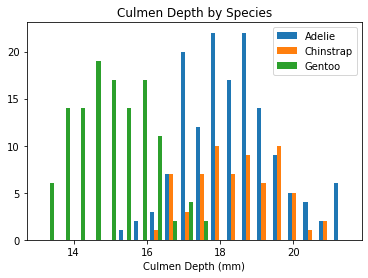

In [12]:
plt.hist([adelie.culmen_depth_mm,chinstrap.culmen_depth_mm,gentoo.culmen_depth_mm],
        label=['Adelie','Chinstrap','Gentoo'],
        bins=20)
plt.legend()
plt.title("Culmen Depth by Species")
plt.xlabel("Culmen Depth (mm)")
plt.show()

Once again, it appears that there are three bell-curved distributions. Gentoo penguins typically have the shortest culmen depth, with a peak culmen length around 14.5mm. There is also little overlap between Gentoo penguins' culmen depth and the other species' culmen depth. Adelie and Chinstrap penguins typically have similar culmen depths, with peaks between around 17.8mm to 18.3mm and 17.8mm to 19mm, respectively.

#### `flipper_length_mm` considering `species`

Now, I will explore the relationship between the length of a penguin's flipper and its species.

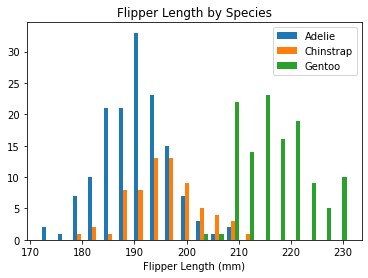

In [13]:
plt.hist([adelie.flipper_length_mm,chinstrap.flipper_length_mm,gentoo.flipper_length_mm],
        label=['Adelie','Chinstrap','Gentoo'],
        bins=20)
plt.legend()
plt.title("Flipper Length by Species")
plt.xlabel("Flipper Length (mm)")
plt.show()

Wow! Once again, there are three bell-curved distributions, and the distributions for Adelie and Chinstrap penguins' flipper length look especially normal. Adelie penguins typically have the shortest flippers, with a peak flipper length around 190mm. Chinstrap penguins typically have longer flippers, with a peak around 195mm. The distribution of Gentoo penguins flipper length has little overlap with the Adelie and Chinstrap penguins, and the Gentoo penguins typically have the longest flipper lengths, with a peak around 215mm.

#### `body_mass_g` considering `species`

Let's see what the relationship between the body mass of the penguins and its species looks like.

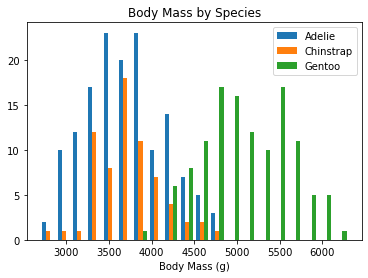

In [14]:
plt.hist([adelie.body_mass_g,chinstrap.body_mass_g,gentoo.body_mass_g],
        label=['Adelie','Chinstrap','Gentoo'],
        bins=20)
plt.legend()
plt.title("Body Mass by Species")
plt.xlabel("Body Mass (g)")
plt.show()

Okay, so once again, there appear to be 3 relatively normal distributions. The distributions for Chinstrap and Adelie penguins' body mass have lots of overlap, both with peaks around 3700g. The Gentoo penguins have little overlap with the other species' in terms of body mass distribution, because that of the Gentoo penguins has a peak between 5000-5500g.

#### Histograms Summary

By plotting the histograms above, I gained a deeper understanding into the distribution of `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g` with respect to each penguins' species. It will be easier to classify penguins based on those variables for the distributions that have little overlap. For example, classifying a penguin based on its `body_mass-g` will be easier for Gentoo penguins than Adelie and Chinstrap because Adelie and Chinstrap penguins have very similar `body_mass_g` distributions.

### Scatterplots

I'm familiar with using scatterplots to compare two numerical variables, so I'll start with doing those comparisons. There appear to be four numerical variables in the dataset: `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, and `body_mass_g`.

#### `culmen_depth_mm` by `culmen_length_mm` considering `species` and `sex`

Let's start by comparing the culmen dimensions: `culmen_length_mm` and `culmen_depth_mm`

In [15]:
culmen_data = data[['culmen_length_mm','culmen_depth_mm']]
culmen_data

,culmen_length_mm,culmen_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
4,36.7,19.3
5,39.3,20.6
...,...,...
338,47.2,13.7
340,46.8,14.3
341,50.4,15.7
342,45.2,14.8


Okay, so here's a short output of the two variables. Let's plot this data in a scatterplot and see if we can find any trends betwen the two variables.


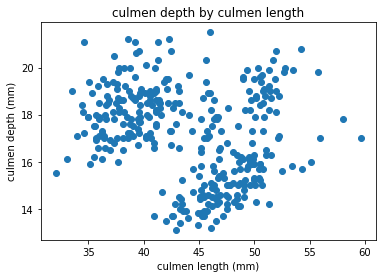

In [16]:
plt.scatter(data.culmen_length_mm, data.culmen_depth_mm)
plt.title("culmen depth by culmen length")
plt.xlabel("culmen length (mm)")
plt.ylabel("culmen depth (mm)")
plt.show()

Okay, so I can't describe a pattern for the overall distribution, but I do notice three different clusters in the scatterplot. The first one is towards the top left corner, the second in the top right corner, and the third towards middle of the bottom half. Perhaps there is a factor that directly affects these values?

There are three clusters and three `species`. Let's try plotting the scatterplot with respect to `species` and see if this explains part of the trend.

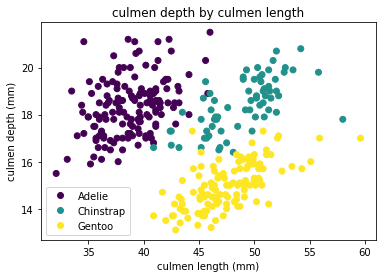

In [24]:
scatter = plt.scatter(data.culmen_length_mm, data.culmen_depth_mm, c=data.species.astype('category').cat.codes)
plt.title("culmen depth by culmen length")
plt.xlabel("culmen length (mm)")
plt.ylabel("culmen depth (mm)")
plt.legend(handles = scatter.legend_elements()[0], labels = ['Adelie','Chinstrap','Gentoo'])
plt.show()

Wow! By coloring the data points based on the penguins' `species`, the three clusters are emphasized. It appears that Adelie penguins generally has a shorter culmen length relative to the other species' but a larger culmen depth. On the other hand, Gentoo penguins typically has longer culmen lengths relatve to the other species', but a shorter culmen depth. Lastly, Chinstrap penguins typically has a large culmen length and large culmen depth relative to those of the other species'.

I wonder what relationship would be revealed if we colored the data by `sex`.

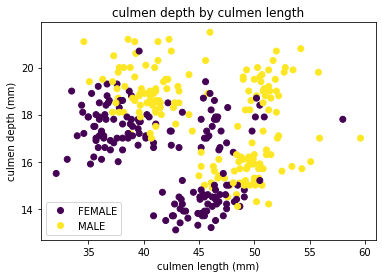

In [32]:
scatter = plt.scatter(data.culmen_length_mm, data.culmen_depth_mm, c=data.sex.astype('category').cat.codes)
plt.title("culmen depth by culmen length")
plt.xlabel("culmen length (mm)")
plt.ylabel("culmen depth (mm)")
plt.legend(handles = scatter.legend_elements()[0], labels = ['FEMALE','MALE'])
plt.show()

Okay, so it appears that within each cluster, female penguins typically have shorter culmen lengths and depths. With that being said, there is a lot of overlap, so I don't think `sex` will be the most influential parameter when classifying the penguins based on `culmen_length_mm` and `culmen_depth_mm`.

#### `body_mass_g` by `flipper_length_mm` considering `species`

In [18]:
flipperLength_x_bodyMass = data[['flipper_length_mm','body_mass_g']]
flipperLength_x_bodyMass

,flipper_length_mm,body_mass_g
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
4,193.0,3450.0
5,190.0,3650.0
...,...,...
338,214.0,4925.0
340,215.0,4850.0
341,222.0,5750.0
342,212.0,5200.0


Okay, so here's a short output of the two variables. Let's plot this data in a scatterplot and see if we can find any trends betwen the two variables.

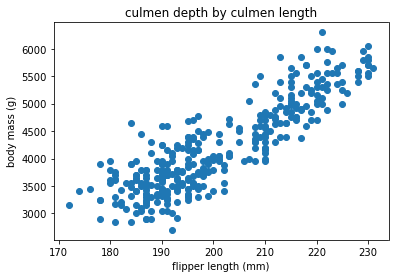

In [19]:
scatter = plt.scatter(data.flipper_length_mm, data.body_mass_g)
plt.title("culmen depth by culmen length")
plt.xlabel("flipper length (mm)")
plt.ylabel("body mass (g)")
plt.show()

Wow! The overall pattern for the data appears to be positive, moderately strongly correlated, and fairly linear. I do notice two clusters, separated by a vertical axis through around `culmen_length` = 205mm. The comparison of `culmen_depth_mm` by `culmen_length_mm` revealed a strong influence of `species` on the physical characteristics of the penguins. I'll plot the graph with respect to the `species` again.

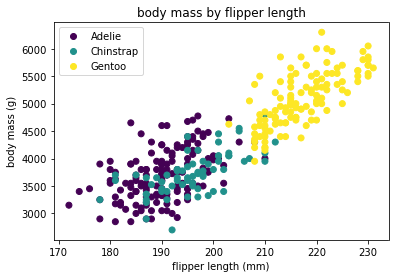

In [35]:
scatter = plt.scatter(data.flipper_length_mm, data.body_mass_g, c=data.species.astype('category').cat.codes)
plt.title("body mass by flipper length")
plt.xlabel("flipper length (mm)")
plt.ylabel("body mass (g)")
plt.legend(handles = scatter.legend_elements()[0], labels = ['Adelie','Chinstrap','Gentoo'])
plt.show()

The coloring by species isn't as distinguishing as last time, but still very distinguishing. Gentoo penguins are the cluster in the top-right of the plot, and its species seems to have the longest flipper length and body mass. Adelie and Chinstrap penguins form the cluster towards the bottom left, and since the points are relatively randomly mixed with one another, the two species have very similar flipper length and body masses.

Let's take a look at the same graph and color it by `sex` this time.

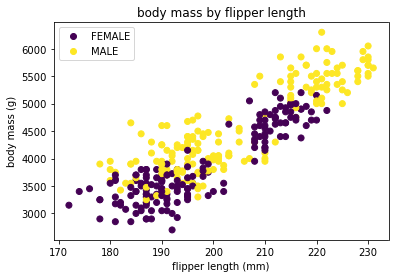

In [34]:
scatter = plt.scatter(data.flipper_length_mm, data.body_mass_g, c=data.sex.astype('category').cat.codes)
plt.title("body mass by flipper length")
plt.xlabel("flipper length (mm)")
plt.ylabel("body mass (g)")
plt.legend(handles = scatter.legend_elements()[0], labels = ['FEMALE', 'MALE'])
plt.show()

This graph is very similar to when we graphed `culmen_length_mm` by `culmen_depth_mm` and colored the points by `sex`. In this graph above, it appears that within each cluster, female penguins typically have shorter flipper lengths and body mass. With that being said, there is a lot of overlap, so I don't think `sex` will be the most influential parameter when classifying the penguins based on `flipper_length_mm` and `body_mass_g`.

### Graphs Summary

I'm going to stop graphing more data at this point. Thus far, I've analyzed the distributions for each explanatory variable (`sex`, `island`, `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g`) in a histogram. I noticed a couple of relationships, particularly those last 4 explanatory variables when I colored the data by `species`. Then, I plotted some of those 4 variables against one another and colored the data by `species` and `sex`. The former filter highlighted distinguished clusters formed by each species, which will be especially helpful for the classifer, and the latter filter highlighted some clusters but there was a lot of overlapping data, which would not be that helpful for the classifier.